### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder ,MinMaxScaler 
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix ,recall_score, f1_score ,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
# load the data into a pandas dataframe
df = pd.read_csv("breast_cancer_data.csv")

In [3]:
# first five data 
df.head() 

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### Trim the values

In [4]:
# select all column with data type object
df_obj = df.select_dtypes(['object']) 

# remove leading or trailing white spaces
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

### Replacing null value

In [5]:
# Replacing null value columns (text) with most used value
a1 = df.select_dtypes(include=['object']).isnull().sum()
for i in a1.index:
    b1 = df[i].value_counts().index.tolist()
    df[i] = df[i].fillna(b1[0])
    
# Replacing null value columns (int, float) with mean value
a1 = df.select_dtypes(include=['integer','float']).isnull().sum()
for i in a1.index:
    df[i] = df[i].fillna(df[i].mean())

In [6]:
# assign target column
y = df.Status

#column to be ignored 
drop_cols = ['Status']

# assign feature columns
x = df.drop(drop_cols,axis=1)

### plot the data

<AxesSubplot:xlabel='Status', ylabel='count'>

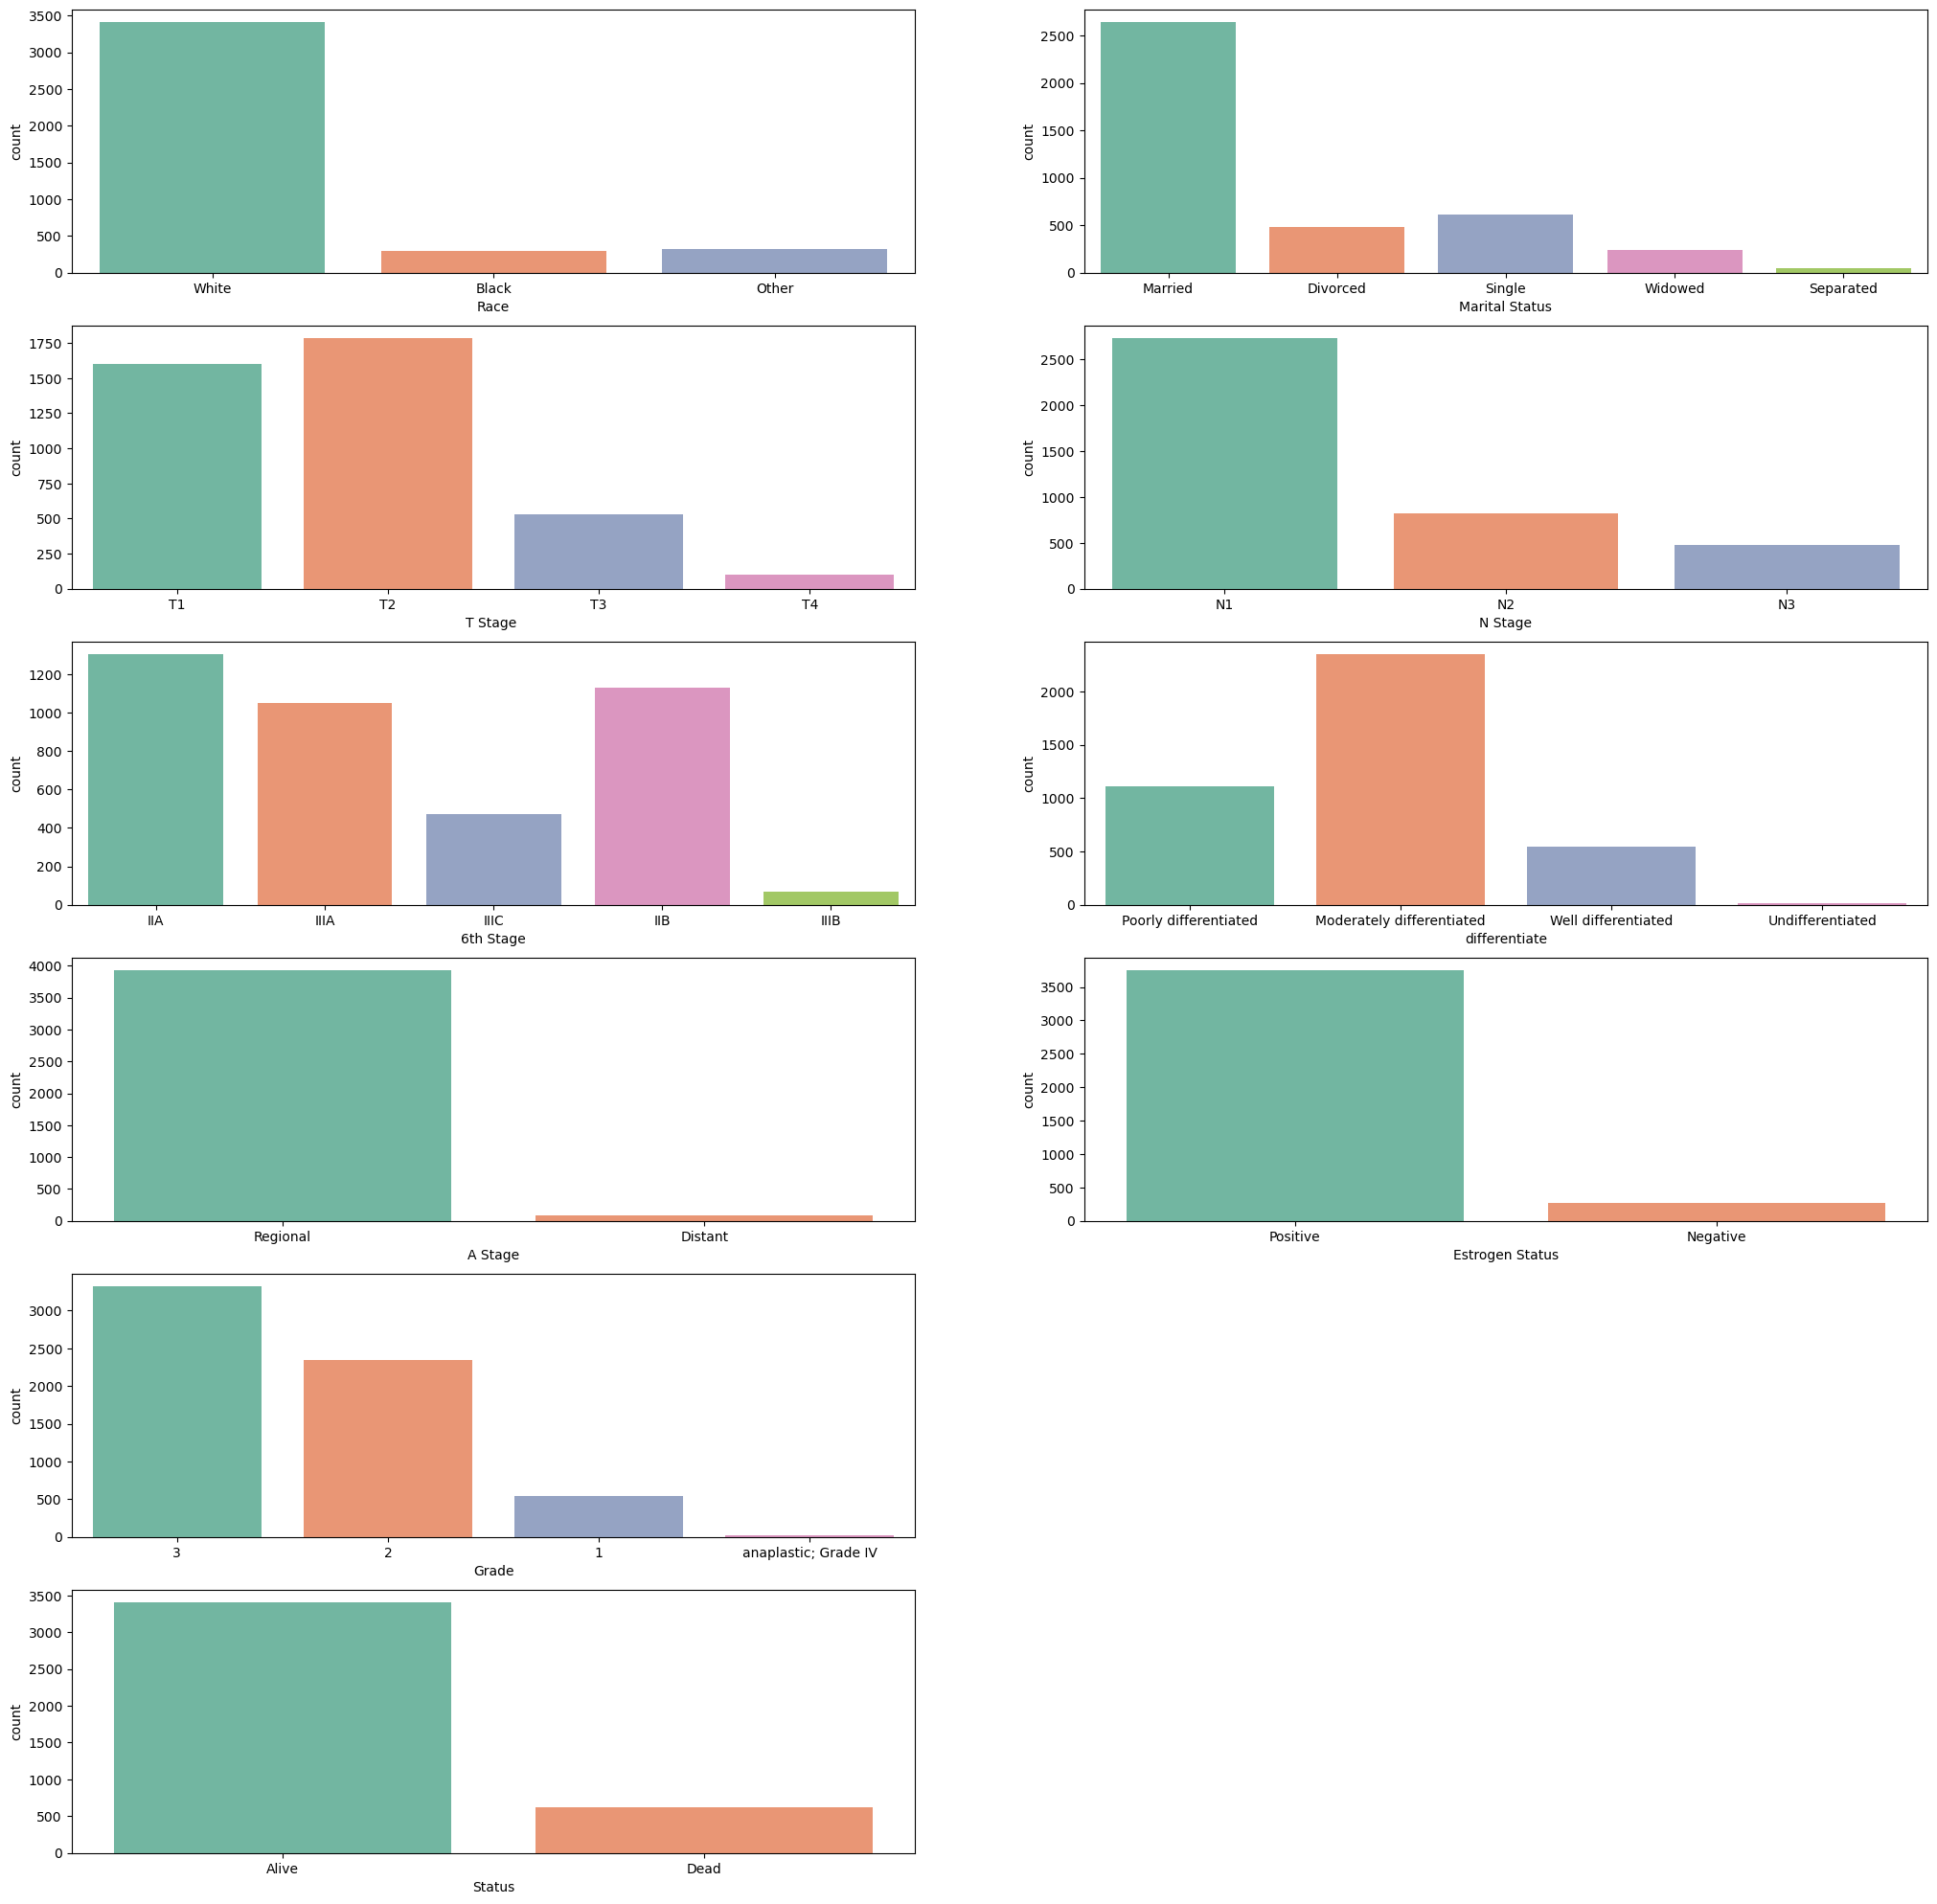

In [7]:
# plot all the column
plt.figure(figsize = (25,25))

plt.subplot(6,2,1)
sns.countplot(x = 'Race', palette='Set2', data = df)

plt.subplot(6,2,2)
sns.countplot(x = 'Marital Status', palette='Set2', data = df)

plt.subplot(6,2,3)
sns.countplot(x = 'T Stage ', palette='Set2', data = df)

plt.subplot(6,2,4)
sns.countplot(x = 'N Stage', palette='Set2', data = df)

plt.subplot(6,2,5)
sns.countplot(x = '6th Stage', palette='Set2', data = df)

plt.subplot(6,2,6)
sns.countplot(x = 'differentiate', palette='Set2', data = df)

plt.subplot(6,2,7)
sns.countplot(x = 'A Stage', palette='Set2', data = df)

plt.subplot(6,2,8)
sns.countplot(x = 'Estrogen Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Progesterone Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Grade', palette='Set2', data = df)

plt.subplot(6,2,11)
sns.countplot(x = 'Status', palette='Set2', data = df)

<AxesSubplot:xlabel='Status', ylabel='count'>

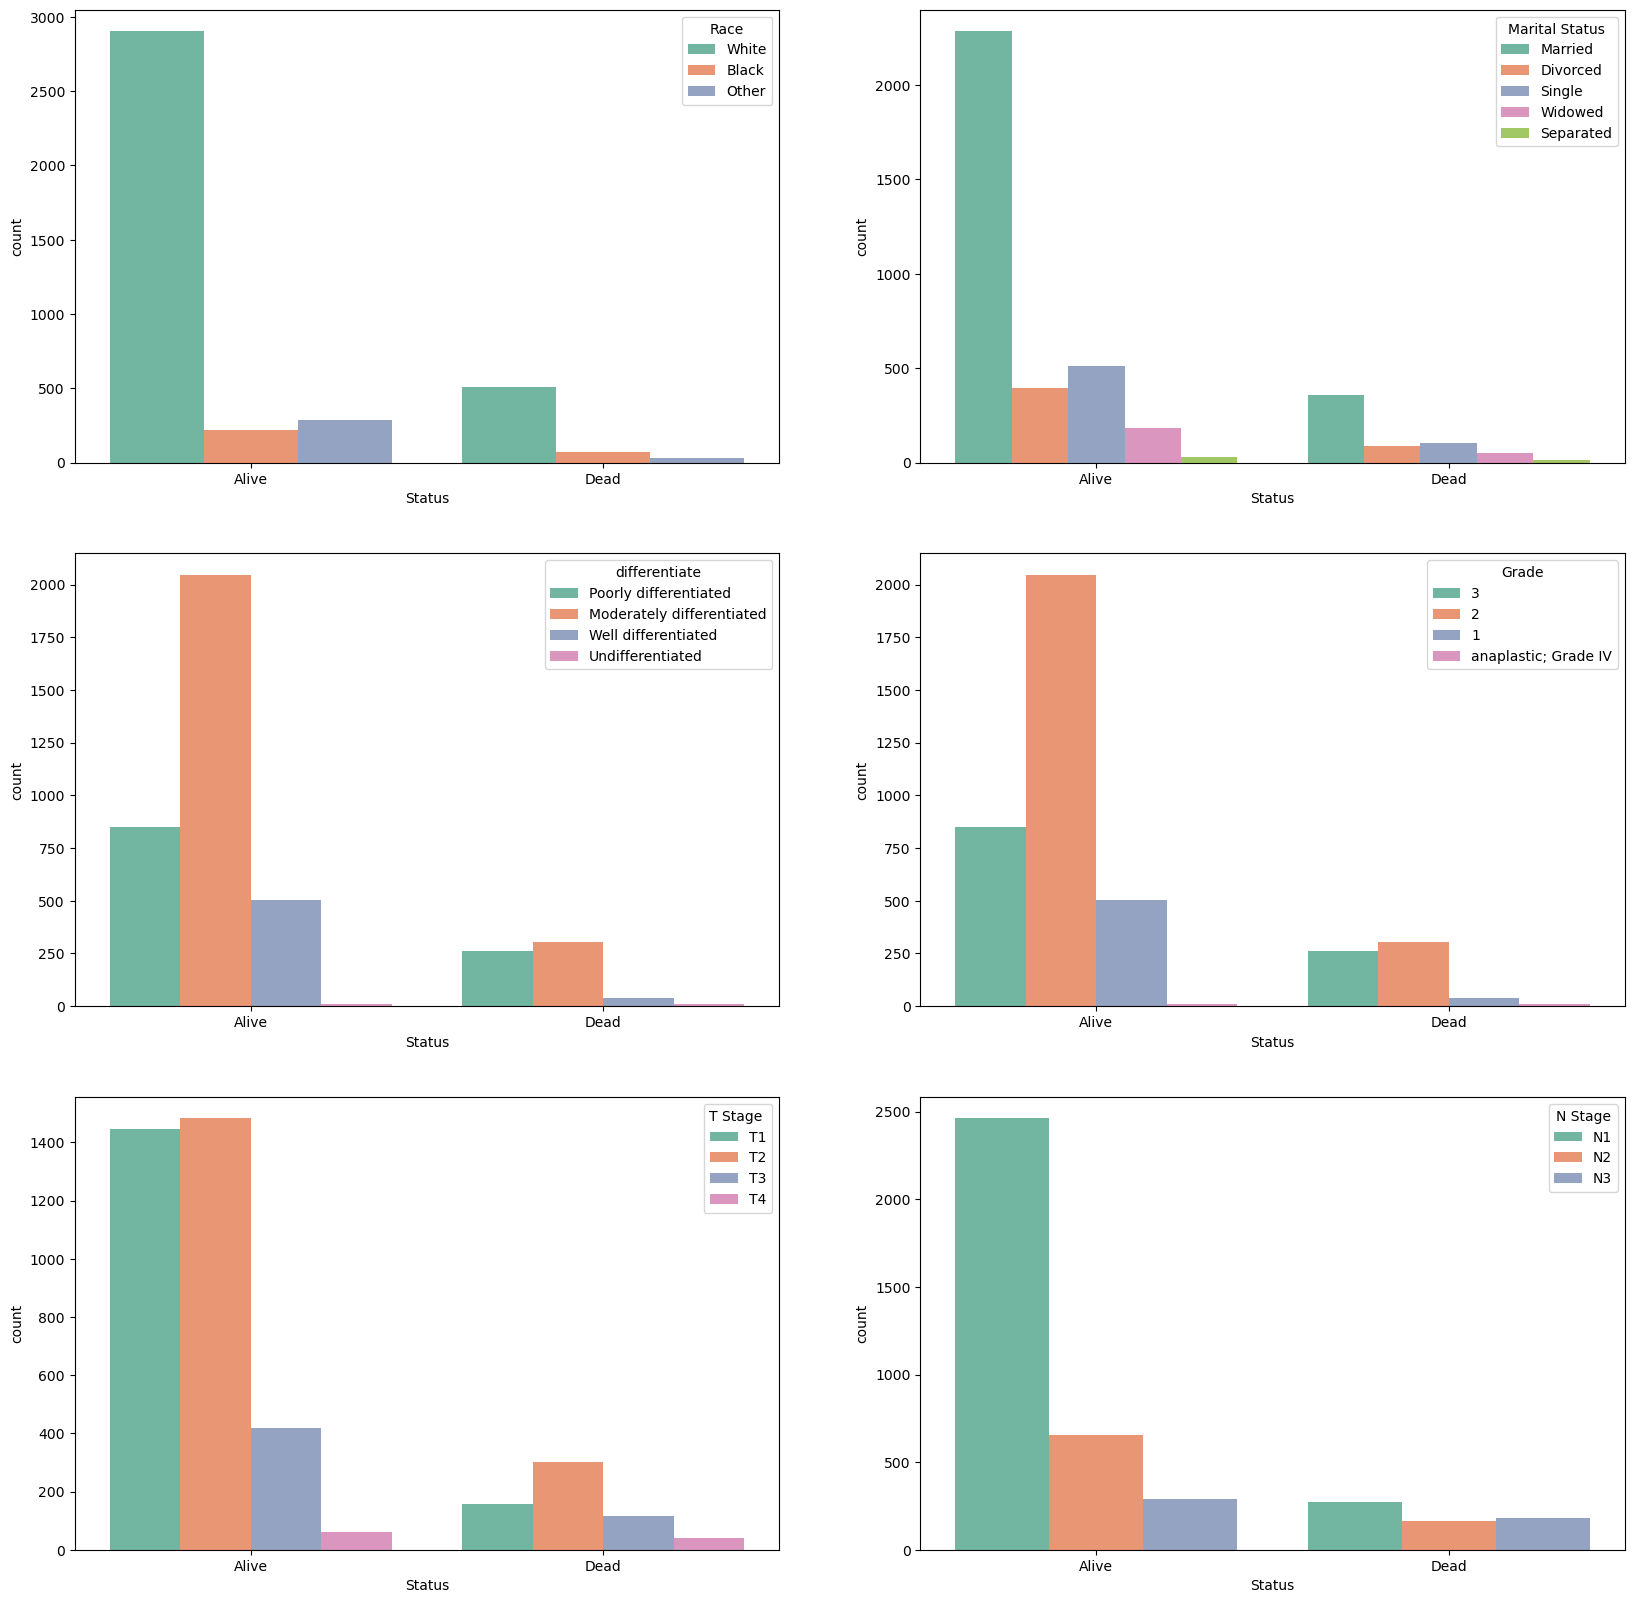

In [8]:
# plot the column against target column
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'Race', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Marital Status', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'differentiate', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'Grade', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= 'T Stage ', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'Status', hue= 'N Stage', palette='Set2', data = df)

### Encoding

In [9]:
# encoding for Race Variable 
race_encoding = {"White":0,"Black":1,"Other":2}
x["Race"] = x["Race"].replace(race_encoding)

# encoding for Marital Status Variable 
marital_status_encoding = {"Married":0,"Single":1,"Divorced":2,"Widowed":3,"Separated":4}
x["Marital Status"] = x["Marital Status"].replace(marital_status_encoding)

# encoding for T Stage Variable
t_stage_encoding = {"T1":0,"T2":1,"T3":2,"T4":3}
x["T Stage "] = x["T Stage "].replace(t_stage_encoding)

# encoding for N Stage Variable 
n_stage_encoding = {"N1":0,"N2":1,"N3":2}
x["N Stage"] = x["N Stage"].replace(n_stage_encoding)

# encoding for 6th Stage Variable 
label_encoder_x= LabelEncoder() 
x["6th Stage"]=label_encoder_x.fit_transform(x["6th Stage"])

# encoding for differentiate Variable     
x["differentiate"]=label_encoder_x.fit_transform(x["differentiate"])

# encoding for Grade Variable 
x["Grade"]=label_encoder_x.fit_transform(x["Grade"])

# encoding for A Stage Variable 
a_stage_encoding = {"Distant":0,"Regional":1}
x["A Stage"] = x["A Stage"].replace(a_stage_encoding)

# encoding for Estrogen Status Variable
estrogen_stage_encoding = {"Negative":0,"Positive":1}
x["Estrogen Status"] = x["Estrogen Status"].replace(estrogen_stage_encoding)

# encoding for Progesterone Status Variable
progesterone_status_encoding = {"Negative":0,"Positive":1}
x["Progesterone Status"] = x["Progesterone Status"].replace(progesterone_status_encoding)

# encoding for Status Variable 
status_encoding = {"Alive":0,"Dead":1}
y = y.replace(status_encoding)

In [10]:
# Normalize numerical columns
scaler = MinMaxScaler()

# Define the numerical columns
numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive','Survival Months']

for col in numerical_cols:
    encoded_col = scaler.fit_transform(df[[col]])
    x[col] = encoded_col
x

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,0.974359,0,0,0,0,0,1,2,1,0.021583,1,1,0.383333,0.000000,0.556604
1,0.512821,0,0,1,1,2,0,1,1,0.244604,1,1,0.216667,0.088889,0.575472
2,0.717949,0,2,2,2,4,0,1,1,0.446043,1,1,0.216667,0.133333,0.698113
3,0.717949,0,0,0,0,0,1,2,1,0.122302,1,1,0.016667,0.000000,0.783019
4,0.435897,0,0,1,0,1,1,2,1,0.287770,1,1,0.033333,0.000000,0.462264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,0.820513,2,0,0,0,0,0,1,1,0.057554,1,1,0.000000,0.000000,0.452830
4020,0.666667,0,2,1,1,2,0,1,1,0.323741,1,1,0.216667,0.155556,0.641509
4021,0.974359,0,0,1,0,1,0,1,1,0.151079,1,0,0.166667,0.044444,0.641509
4022,0.717949,1,2,1,0,1,0,1,1,0.309353,1,1,0.166667,0.000000,0.669811


In [11]:
# remove headers
x = x.iloc[:,:-1].values

### Split the data

In [12]:
# split data into traing and testing
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.25, random_state=42)

### Train the model Logistic Regression

In [13]:
# Logistic Regression
lgr = LogisticRegression()

# train the model
lgr.fit(X_train, y_train)

# make prediction 
test_pred = lgr.predict(X_test)

# outputs
print("Mean squared for logistic regression is : ",round(mean_squared_error(y_test,test_pred),3))
print("Accuracy score for logistic regression is : ",round(accuracy_score(y_test,test_pred),3))
print("f1 score for logistic regression is : ",round(f1_score(y_test,test_pred),3))
print("recall for logistic regression is : ",round(recall_score(y_test,test_pred),3))
print("precision score for logistic regression is : ",round(precision_score(y_test,test_pred),3))
print("Confusion matrix for logistic regression is : ",confusion_matrix(y_test,test_pred))


Mean squared for logistic regression is :  0.127
Accuracy score for logistic regression is :  0.873
f1 score for logistic regression is :  0.273
recall for logistic regression is :  0.168
precision score for logistic regression is :  0.727
Confusion matrix for logistic regression is :  [[854   9]
 [119  24]]


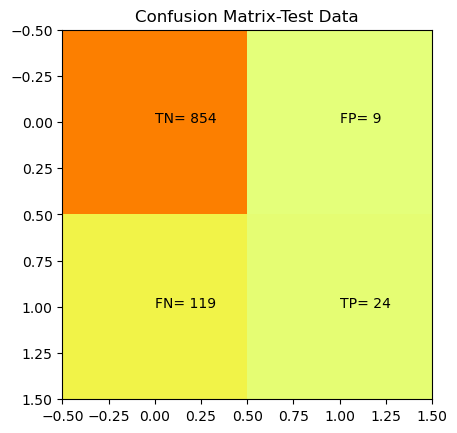

In [14]:
# visualize the confusion matrix
plt.clf()
cm = confusion_matrix(y_test,test_pred)

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)

plt.title('Confusion Matrix-Test Data')

s = [['TN','FP'],['FN','TP']]
for k in range(2):
    for l in range(2):
        plt.text(l,k,str(s[k][l])+"= "+str(cm[k][l]))
plt.show()

### Decision Tree Classifier

In [15]:
# decision tree classification
dc_clf = DecisionTreeClassifier()

# train with decision tree
dc_clf.fit(X_train, y_train)

# make prediction
dc_pred = dc_clf.predict(X_test)

# outputs
print("Mean squared for decision tree is : ",round(mean_squared_error(y_test,dc_pred),3))
print("Accuracy score for decision tree is : ",round(accuracy_score(y_test,dc_pred),3))
print("f1 score for decision tree is : ",round(f1_score(y_test,dc_pred),3))
print("recall for decision tree is : ",round(recall_score(y_test,dc_pred),3))
print("precision score for decision tree is : ",round(precision_score(y_test,dc_pred),3))
print("Confusion matrix for decision tree is : ",confusion_matrix(y_test,dc_pred))


Mean squared for decision tree is :  0.22
Accuracy score for decision tree is :  0.78
f1 score for decision tree is :  0.28
recall for decision tree is :  0.301
precision score for decision tree is :  0.262
Confusion matrix for decision tree is :  [[742 121]
 [100  43]]


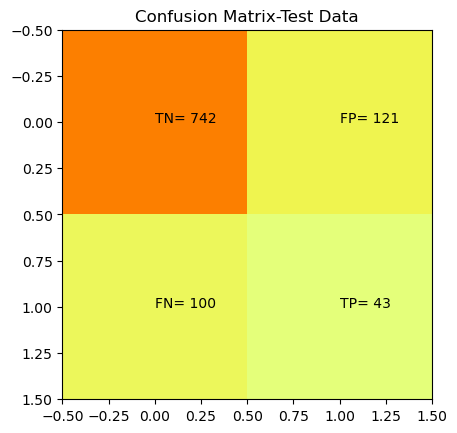

In [16]:
# visualize the confusion matrix
plt.clf()
cm = confusion_matrix(y_test,dc_pred)

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)

plt.title('Confusion Matrix-Test Data')

s = [['TN','FP'],['FN','TP']]
for k in range(2):
    for l in range(2):
        plt.text(l,k,str(s[k][l])+"= "+str(cm[k][l]))
plt.show()

### RandomForest Classifier

In [17]:
# random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

# train the model
rf_clf.fit(X_train, y_train)

# make prediction
rf_pred = rf_clf.predict(X_test)

# output
print("Mean squared for random forest is : ",round(mean_squared_error(y_test,rf_pred),3))
print("Accuracy score for random forest is : ",round(accuracy_score(y_test,rf_pred),3))
print("f1 score for random forest is : ",round(f1_score(y_test,rf_pred),3))
print("recall for random forest is : ",round(recall_score(y_test,rf_pred),3))
print("precision score for random forest is : ",round(precision_score(y_test,rf_pred),3))
print("Confusion matrix for random forest is : ",confusion_matrix(y_test,rf_pred))


Mean squared for random forest is :  0.149
Accuracy score for random forest is :  0.851
f1 score for random forest is :  0.265
recall for random forest is :  0.189
precision score for random forest is :  0.443
Confusion matrix for random forest is :  [[829  34]
 [116  27]]


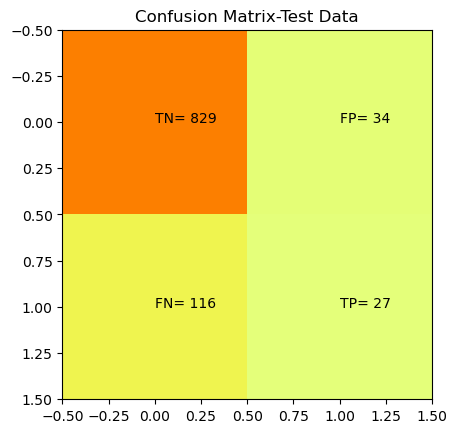

In [18]:
# visualize the confusion matrix
plt.clf()
cm = confusion_matrix(y_test,rf_pred)

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)

plt.title('Confusion Matrix-Test Data')

s = [['TN','FP'],['FN','TP']]
for k in range(2):
    for l in range(2):
        plt.text(l,k,str(s[k][l])+"= "+str(cm[k][l]))
plt.show()

### Support vector machine Classifier

In [19]:
# support vector machine
svm_clf = SVC()

# train the model
svm_clf.fit(X_train, y_train)

# make prediction
svm_pred = svm_clf.predict(X_test)

# outputs
print("Mean squared for support vector machine is : ",round(mean_squared_error(y_test,svm_pred),3))
print("Accuracy score for support vector machine is : ",round(accuracy_score(y_test,svm_pred),3))
print("f1 score for support vector machine is : ",round(f1_score(y_test,svm_pred),3))
print("recall for support vector machine is : ",round(recall_score(y_test,svm_pred),3))
print("precision score for support vector machine is : ",round(precision_score(y_test,svm_pred),3))
print("Confusion matrix for support vector machine is : ",confusion_matrix(y_test,svm_pred))


Mean squared for support vector machine is :  0.134
Accuracy score for support vector machine is :  0.866
f1 score for support vector machine is :  0.192
recall for support vector machine is :  0.112
precision score for support vector machine is :  0.667
Confusion matrix for support vector machine is :  [[855   8]
 [127  16]]


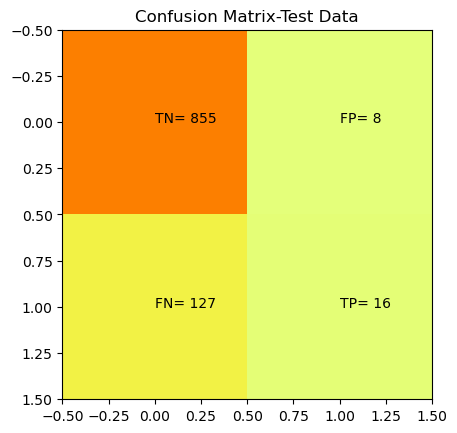

In [20]:
# visualize the confusion matrix
plt.clf()
cm = confusion_matrix(y_test,svm_pred)

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)

plt.title('Confusion Matrix-Test Data')

s = [['TN','FP'],['FN','TP']]
for k in range(2):
    for l in range(2):
        plt.text(l,k,str(s[k][l])+"= "+str(cm[k][l]))
plt.show()